# Is our main food production model efficient enough to feed them all ?


## introduction :
A lot of new agricultural model are nowaday opposed to the dominant one (organic agriculture, permaculture ...) and their main criticism is on how efficient are they to provide food for everyone.
But we never as the other way : is the actual model capable of been enhanced enough to ensure population growth ?
Thus, we will take a look of evolution of agriculture in the last year and see if the trend let us ensure enhancing for the future


Explain the data source


## Part 1 : How can we describe the current world production of food and how has it evolved for the last decades?

What's inside :
Maps representing normalized value of yield for severals type of crops

As a starting point, let's study the current world distribution of food production. Food production can be divided into several subsets, such as meat production, fruits/vegetables production, cereals production... To draw a global vision of the topic, let's study different big classes of food.  

#### 1) Meat production

In [1]:
# Let's import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
import json
from ipywidgets import IntSlider, interact

In [2]:
# Opening database
df_livestock_prim = pd.read_csv('data/Production_LivestockPrimary_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')

To study the evolution of the quantity of meat production, we will use a dataset from the FAO database. We will first take a look at its structure. 

In [3]:
# Visualizing the first dataframe
livestock = df_livestock_prim.copy()
livestock.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1961,1961,1000 Head,4000.0,F
1,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1962,1962,1000 Head,4400.0,F
2,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1963,1963,1000 Head,4600.0,F
3,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1964,1964,1000 Head,4800.0,F
4,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1965,1965,1000 Head,5200.0,F


This dataframe contains information about the production of meat, eggs and milk products. It also contains several code that helps to refer to certain class of food. The items are already grouped by bigger families in the dataset. The 3 families we will keep on studying are  *Meat, Total* (item 1765), *Milk, Total* (item 1780) and *Eggs Primary* (item 1783). We only keep the production of those types of food.

In [4]:
# Keep only the meat, the eggs and the milk products
items = [1765, 1780, 1783]
livestock = livestock[livestock['Item Code'].isin(items)]

# Keep only the production
livestock_prod = livestock[livestock.Element == 'Production']

In [5]:
# Check if they are missing values
print("Missing values in livestock_prod:", livestock_prod.isnull().sum().sum())

Missing values in livestock_prod: 100


In [6]:
# Check that we have the same unit for similar products
print("Unit for the meat production:", livestock_prod[livestock_prod.Item == 'Meat, Total'].Unit.unique())
print("Unit for the eggs production:", livestock_prod[livestock_prod.Item == 'Eggs Primary'].Unit.unique())
print("Unit for the milk production:", livestock_prod[livestock_prod.Item == 'Milk,Total'].Unit.unique())

Unit for the meat production: ['tonnes']
Unit for the eggs production: ['tonnes']
Unit for the milk production: ['tonnes']


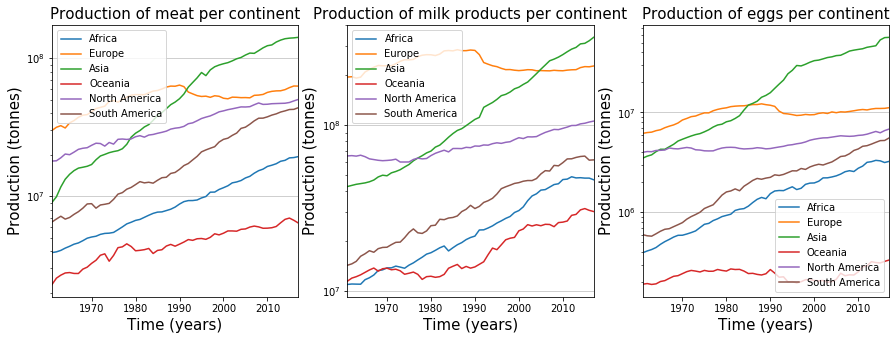

In [7]:
# Visualisation of the evolution of the quantity of livestocks per continent

def select_area(production, area):
    df = production[production.Area == area]
    meat = df[df['Item Code'] == 1765]
    milk = df[df['Item Code'] == 1780]
    eggs = df[df['Item Code'] == 1783]
    return  meat, milk, eggs

afr_meat, afr_milk, afr_eggs = select_area(livestock_prod, 'Africa')
eu_meat, eu_milk, eu_eggs   = select_area(livestock_prod, 'Europe')
as_meat, as_milk, as_eggs   = select_area(livestock_prod, 'Asia')
oc_meat, oc_milk, oc_eggs   = select_area(livestock_prod, 'Oceania')
nam_meat, nam_milk, nam_eggs = select_area(livestock_prod, 'Northern America')
sam_meat, sam_milk, sam_eggs = select_area(livestock_prod, 'South America')

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1,3,1)

# Production of meat
afr_meat.plot('Year', 'Value', logy=True, ax=ax1)
eu_meat.plot('Year', 'Value', logy=True, ax=ax1)
as_meat.plot('Year', 'Value', logy=True, ax=ax1)
oc_meat.plot('Year', 'Value', logy=True, ax=ax1)
nam_meat.plot('Year', 'Value', logy=True, ax=ax1)
sam_meat.plot('Year', 'Value', logy=True, ax=ax1)
ax1.set_title('Production of meat per continent', fontsize=15)
ax1.set_xlabel('Time (years)', fontsize=15)
ax1.set_ylabel('Production (tonnes)', fontsize=15)
ax1.legend(['Africa', 'Europe', 'Asia', 'Oceania', 'North America', 'South America'])
ax1.grid(axis='y', alpha=0.75)

ax2 = fig.add_subplot(1,3,2)

# Yield of milk products
afr_milk.plot('Year', 'Value', logy=True, ax=ax2)
eu_milk.plot('Year', 'Value', logy=True, ax=ax2)
as_milk.plot('Year', 'Value', logy=True, ax=ax2)
oc_milk.plot('Year', 'Value', logy=True, ax=ax2)
nam_milk.plot('Year', 'Value', logy=True, ax=ax2)
sam_milk.plot('Year', 'Value', logy=True, ax=ax2)
ax2.set_title('Production of milk products per continent', fontsize=15)
ax2.set_xlabel('Time (years)', fontsize=15)
ax2.set_ylabel('Production (tonnes)', fontsize=15)
ax2.legend(['Africa', 'Europe', 'Asia', 'Oceania', 'North America', 'South America'])
ax2.grid(axis='y', alpha=0.75)

ax3 = fig.add_subplot(1,3,3)

# Yield of eggs
afr_eggs.plot('Year', 'Value', logy=True, ax=ax3)
eu_eggs.plot('Year', 'Value', logy=True, ax=ax3)
as_eggs.plot('Year', 'Value', logy=True, ax=ax3)
oc_eggs.plot('Year', 'Value', logy=True, ax=ax3)
nam_eggs.plot('Year', 'Value', logy=True, ax=ax3)
sam_eggs.plot('Year', 'Value', logy=True, ax=ax3)
ax3.set_title('Production of eggs per continent', fontsize=15)
ax3.set_xlabel('Time (years)', fontsize=15)
ax3.set_ylabel('Production (tonnes)', fontsize=15)
ax3.legend(['Africa', 'Europe', 'Asia', 'Oceania', 'North America', 'South America'])
ax3.grid(axis='y', alpha=0.75)

The global evolution is increasing as expected. It seems that we have a missing value for the meat production at the year 2018. 
Let's try to visualize those graphs on a folium map. First, let's take a look at the distribution of the values.

Text(0.5, 1.0, 'Distribution of the values taken in livestock_prod')

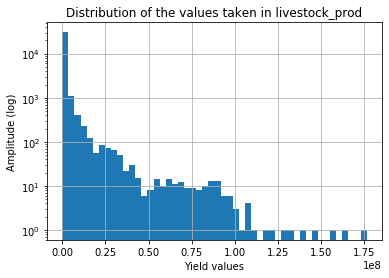

In [8]:
# We now want to study the stocks for each country
livestock_country = livestock_prod[livestock_prod['Area Code'] < 5000] # to get rid of the groups such as the continents

# Plot the distribution of the values taken in the row 'Value'
livestock_country.Value.hist(bins = 50, log=True)
plt.xlabel('Yield values')
plt.ylabel('Amplitude (log)')
plt.title('Distribution of the values taken in livestock_prod')

A logarithm scale seems appropriated for this case.

In [9]:
# Create a new column with the log value of each stock value
livestock_country['Log Value'] = livestock_country.Value.transform(lambda x:round(np.log(x)))
livestock_country['Log Value'] = livestock_country['Log Value'].replace(-np.inf, 0)

/home/clelie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/clelie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Now, we have to prepare the map with our json file 'countries.json'.

In [10]:
# Preparing the map
json_file = pd.read_json("countries.json")
df_json = pd.DataFrame({'Area': json_file['name'], 'id': json_file['cca3']})
df_json.head()

,Area,id
0,"{'common': 'Aruba', 'official': 'Aruba', 'nati...",ABW
1,"{'common': 'Afghanistan', 'official': 'Islamic...",AFG
2,"{'common': 'Angola', 'official': 'Republic of ...",AGO
3,"{'common': 'Anguilla', 'official': 'Anguilla',...",AIA
4,"{'common': 'Åland Islands', 'official': 'Åland...",ALA


In [11]:
# Change the format for the name column by taking the common name of each country
def name_json(df):
    df_size = len(df)
    for i in range(df_size):
        df.Area[i] = df.Area[i]['common'][0:len(df.Area[i]['common'])]
    return df

df_json = name_json(df_json)
df_json.head()

,Area,id
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Anguilla,AIA
4,Åland Islands,ALA


In [12]:
# Dealing with the different ways to call a same country
def replace_values_area(df):
    df[df.Area == 'United States'] = df[df.Area == 'United States'].replace('United States', 'United States of America')
    df[df.Area == 'Russia'] = df[df.Area == 'Russia'].replace('Russia', 'Russian Federation')
    df[df.Area == 'Bolivia'] = df[df.Area == 'Bolivia'].replace('Bolivia', 'Bolivia (Plurinational State of)')
    df[df.Area == 'Venezuela'] = df[df.Area == 'Venezuela'].replace('Venezuela', 'Venezuela (Bolivarian Republic of)')
    df[df.Area == 'Ivory Coast'] = df[df.Area == 'Ivory Coast'].replace('Ivory Coast', 'Côte d\'Ivoire')
    df[df.Area == 'DR Congo'] = df[df.Area == 'DR Congo'].replace('DR Congo', 'Democratic Republic of the Congo')
    df[df.Area == 'Republic of the Congo'] = df[df.Area == 'Republic of the Congo'].replace('Republic of the Congo', 'Congo')   
    df[df.Area == 'Moldova'] = df[df.Area == 'Moldova'].replace('Moldova', 'Republic of Moldova')
    df[df.Area == 'Syria'] = df[df.Area == 'Syria'].replace('Syria', 'Syrian Arab Republic')
    df[df.Area == 'Iran'] = df[df.Area == 'Iran'].replace('Iran', 'Iran (Islamic Republic of)')
    df[df.Area == 'Vietnam'] = df[df.Area == 'Vietnam'].replace('Vietnam', 'Viet Nam')
    df[df.Area == 'Laos'] = df[df.Area == 'Laos'].replace('Laos', 'Lao People\'s Democratic Republic')
    df[df.Area == 'North Korea'] = df[df.Area == 'North Korea'].replace('North Korea', 'Democratic People\'s Republic of Korea')
    df[df.Area == 'South Korea'] = df[df.Area == 'South Korea'].replace('South Korea', 'Republic of Korea')
    df[df.Area == 'Tanzania'] = df[df.Area == 'Tanzania'].replace('Tanzania', 'United Republic of Tanzania')
    df[df.Area == 'Taiwan'] = df[df.Area == 'Taiwan'].replace('Taiwan', 'China, Taiwan Province of')
    df[df.Area == 'Brunei'] = df[df.Area == 'Brunei'].replace('Brunei', 'Brunei Darussalam')
    return(df)

df_json = replace_values_area(df_json)

In [13]:
# Merge the df_json dataframe to our initial dataframe
# They will have the right id for each country
livestock_country = livestock_country.merge(df_json, on='Area', how='inner')
livestock_country.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Log Value,id
0,2,Afghanistan,1783,Eggs Primary,5510,Production,1961,1961,tonnes,10000.0,A,9.0,AFG
1,2,Afghanistan,1783,Eggs Primary,5510,Production,1962,1962,tonnes,11000.0,A,9.0,AFG
2,2,Afghanistan,1783,Eggs Primary,5510,Production,1963,1963,tonnes,11500.0,A,9.0,AFG
3,2,Afghanistan,1783,Eggs Primary,5510,Production,1964,1964,tonnes,12000.0,A,9.0,AFG
4,2,Afghanistan,1783,Eggs Primary,5510,Production,1965,1965,tonnes,12800.0,A,9.0,AFG


In [14]:
# Example : Production of milk in 2000
map1 = folium.Map(location=[0,0], zoom_start=2)
state_geo_path = r'countries.geo.json'
geo_json_data = json.load(open(state_geo_path))
folium.GeoJson(geo_json_data).add_to(map1)
data = livestock_country[livestock_country.Year == 2000]
data = data[data['Item Code'] == 1780]

folium.Choropleth(geo_data=geo_json_data, data=data,
             columns=['id', 'Log Value'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.6, line_opacity=0.2,
             legend_name='Logarithm Production of milk products (tonnes)').add_to(map1)

map1.save('milk_production_2000.html')
map1

# A refaire
This example is quite consistent. The countries that have the best yield for milk are in dark purple and correspond to the countries that consume the most this type of food. Asian and African countries don't produce that much.
In the future, we would like to add a TimeSlider to visualize the evolution of the map during time but we haven't found any way to do it for now.

#### 2) Fruit/Vegetable production

A new dataset is used to study the production and the yield of fruits and vegetables. Let's visualize it and preprocess it.

In [15]:
df_prod_crops = pd.read_csv('data/Production_Crops_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
crops = df_prod_crops.copy()
crops.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F
1,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0,F
2,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1977,1977,ha,6000.0,F
3,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1978,1978,ha,6000.0,F
4,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1979,1979,ha,6000.0,F


The same structure is provided for this dataset. Grouped items exist and we will study the vegetables, the fruits, the roots.

In [16]:
crops_item = [1738, 1720, 1735]
crops = crops[crops['Item Code'].isin(crops_item)]

In [17]:
crops.Item.unique()

array(['Fruit Primary', 'Roots and Tubers,Total', 'Vegetables Primary'],
      dtype=object)

In [18]:
# Compute the log values
crops['Log Value'] = crops.Value.transform(lambda x:round(np.log(x)))
crops['Log Value'] = crops['Log Value'].replace(-np.inf, 0)

As an example, let's visualize the yield of each of them per continent since 1961.

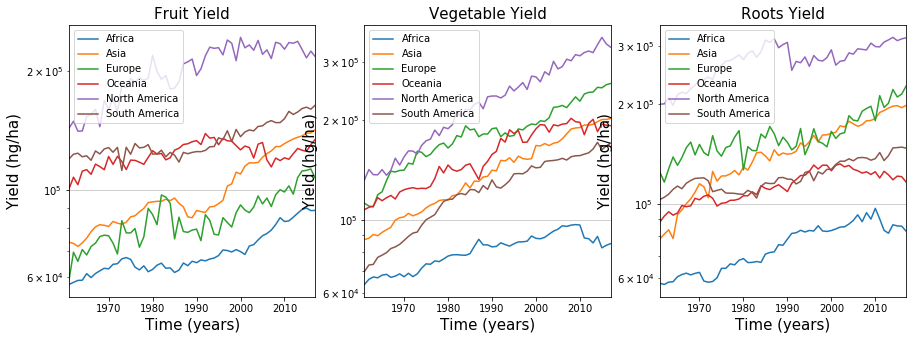

In [19]:
# Visualisation of the evolution of the quantity of crops per continent

def select_area(production, area):
    df = production[production.Area == area]
    fruit = df[df['Item Code'] == 1738]
    veggies = df[df['Item Code'] == 1735]
    roots = df[df['Item Code'] == 1720]
    return  fruit, veggies, roots

yield_crops = crops[crops.Element=='Yield']
yield_crops  = yield_crops.sort_values('Year')

afr_fruit, afr_veggies, afr_roots = select_area(yield_crops, 'Africa')
eu_fruit, eu_veggies, eu_roots   = select_area(yield_crops, 'Europe')
as_fruit, as_veggies, as_roots   = select_area(yield_crops, 'Asia')
oc_fruit, oc_veggies, oc_roots   = select_area(yield_crops, 'Oceania')
nam_fruit, nam_veggies, nam_roots = select_area(yield_crops, 'Northern America')
sam_fruit, sam_veggies, sam_roots = select_area(yield_crops, 'South America')

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1,3,1)

afr_fruit.plot('Year', 'Value', logy=True, ax=ax1)
as_fruit.plot('Year', 'Value', logy=True, ax=ax1)
eu_fruit.plot('Year','Value', logy=True, ax=ax1)
oc_fruit.plot('Year', 'Value', logy=True, ax=ax1)
nam_fruit.plot('Year', 'Value', logy=True, ax=ax1)
sam_fruit.plot('Year', 'Value', logy=True, ax=ax1)
ax1.set_title('Fruit Yield', fontsize=15)
ax1.set_xlabel('Time (years)', fontsize=15)
ax1.set_ylabel('Yield (hg/ha)', fontsize=15)
ax1.legend(['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America'])
ax1.grid(axis='y', alpha=0.75)

ax2 = fig.add_subplot(1,3,2)
afr_veggies.plot('Year', 'Value', logy=True, ax=ax2)
as_veggies.plot('Year', 'Value', logy=True, ax=ax2)
eu_veggies.plot('Year', 'Value', logy=True, ax=ax2)
oc_veggies.plot('Year', 'Value', logy=True, ax=ax2)
nam_veggies.plot('Year', 'Value', logy=True, ax=ax2)
sam_veggies.plot('Year', 'Value', logy=True, ax=ax2)
ax2.set_title('Vegetable Yield', fontsize=15)
ax2.set_xlabel('Time (years)', fontsize=15)
ax2.set_ylabel('Yield (hg/ha)', fontsize=15)
ax2.legend(['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America'])
ax2.grid(axis='y', alpha=0.75)

ax3 = fig.add_subplot(1,3,3)
afr_roots.plot('Year', 'Value', logy=True, ax=ax3)
as_roots.plot('Year', 'Value', logy=True, ax=ax3)
eu_roots.plot('Year', 'Value', logy=True, ax=ax3)
oc_roots.plot('Year', 'Value', logy=True, ax=ax3)
nam_roots.plot('Year', 'Value', logy=True, ax=ax3)
sam_roots.plot('Year', 'Value', logy=True, ax=ax3)
ax3.set_title('Roots Yield', fontsize=15)
ax3.set_xlabel('Time (years)', fontsize=15)
ax3.set_ylabel('Yield (hg/ha)', fontsize=15)
ax3.legend(['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America'])
ax3.grid(axis='y', alpha=0.75)

Let's use a map to represent this information. We will use the same commands as before.

In [20]:
# Example : Yield of Fruits in 2000

# Merge the df_json dataframe to our yield dataframe
yield_crops = yield_crops.merge(df_json, on='Area', how='inner')

map2 = folium.Map(location=[0,0], zoom_start=2)
state_geo_path = r'countries.geo.json'
geo_json_data = json.load(open(state_geo_path))
folium.GeoJson(geo_json_data).add_to(map1)
data = yield_crops[yield_crops.Year == 2000]
data = data[data.Item == 'Roots and Tubers,Total']

folium.Choropleth(geo_data=geo_json_data, data=data,
             columns=['id', 'Log Value'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Yield of roots in 2000').add_to(map2)
map2.save('yield_fruit_2000.html')
map2

#### 3) Cereal production

The cereal production and yield are given in the same data frame as vegetables. We will take a look at the cereals and the coarse grains.

['Cereals,Total' 'Coarse Grain, Total']


/home/clelie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/clelie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


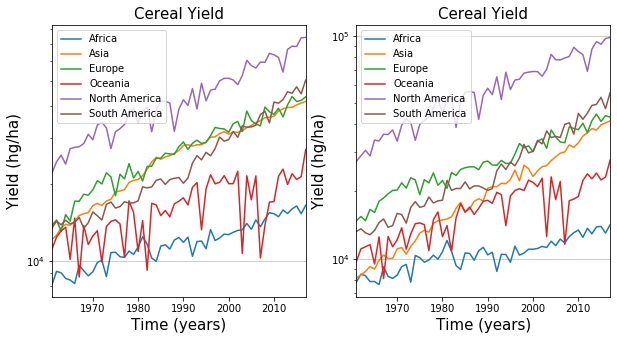

In [25]:
crops = df_prod_crops.copy()

cereal_items = [1717, 1814]
crops_cereals = crops[crops['Item Code'].isin(cereal_items)]
print(crops_cereals.Item.unique())

# Compute the log values
crops_cereals['Log Value'] = crops_cereals.Value.transform(lambda x:round(np.log(x)))
crops_cereals['Log Value'] = crops_cereals['Log Value'].replace(-np.inf, 0)

# Take the yield values for cereals
tmp  = crops_cereals[crops_cereals.Element == 'Yield']
cereals_yield = tmp[tmp['Item Code'] == 1717]
cereals_yield = cereals_yield.sort_values('Year')
grains_yield = tmp[tmp['Item Code'] == 1814]
grains_yield = grains_yield.sort_values('Year')

fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1,2,1)

cereals_yield[cereals_yield.Area == 'Africa'].plot('Year', 'Value', logy=True, ax=ax1)
cereals_yield[cereals_yield.Area == 'Asia'].plot('Year', 'Value', logy=True, ax=ax1)
cereals_yield[cereals_yield.Area == 'Europe'].plot('Year','Value', logy=True, ax=ax1)
cereals_yield[cereals_yield.Area == 'Oceania'].plot('Year', 'Value', logy=True, ax=ax1)
cereals_yield[cereals_yield.Area == 'Northern America'].plot('Year', 'Value', logy=True, ax=ax1)
cereals_yield[cereals_yield.Area == 'South America'].plot('Year', 'Value', logy=True, ax=ax1)
ax1.set_title('Cereal Yield', fontsize=15)
ax1.set_xlabel('Time (years)', fontsize=15)
ax1.set_ylabel('Yield (hg/ha)', fontsize=15)
ax1.legend(['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America'])
ax1.grid(axis='y', alpha=0.75)

ax2 = fig.add_subplot(1,2,2)

grains_yield[grains_yield.Area == 'Africa'].plot('Year', 'Value', logy=True, ax=ax2)
grains_yield[grains_yield.Area == 'Asia'].plot('Year', 'Value', logy=True, ax=ax2)
grains_yield[grains_yield.Area == 'Europe'].plot('Year','Value', logy=True, ax=ax2)
grains_yield[grains_yield.Area == 'Oceania'].plot('Year', 'Value', logy=True, ax=ax2)
grains_yield[grains_yield.Area == 'Northern America'].plot('Year', 'Value', logy=True, ax=ax2)
grains_yield[grains_yield.Area == 'South America'].plot('Year', 'Value', logy=True, ax=ax2)
ax2.set_title('Cereal Yield', fontsize=15)
ax2.set_xlabel('Time (years)', fontsize=15)
ax2.set_ylabel('Yield (hg/ha)', fontsize=15)
ax2.legend(['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America'])
ax2.grid(axis='y', alpha=0.75)

Again, the corresponding map follows.

In [26]:
# Example : Yield of Cereals in 2000

# Merge the df_json dataframe to our initial dataframe
cereals_yield = cereals_yield.merge(df_json, on='Area', how='inner')

map3 = folium.Map(location=[0,0], zoom_start=2)
state_geo_path = r'countries.geo.json'
geo_json_data = json.load(open(state_geo_path))
folium.GeoJson(geo_json_data).add_to(map1)
data = cereals_yield[cereals_yield.Year == 2000]

map3.choropleth(geo_data=geo_json_data, data=data,
             columns=['id', 'Log Value'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.6, line_opacity=0.2,
             legend_name='Production of Cereals in 2000')

map3.save('yield_cereals_2000.html')
map3

/home/clelie/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


Transition :
We took a look at food production efficiency for several plants. 
Is there a way to compute that efficiency for a country to assess their agricultural model ?

## Part 2 : PCA or how to estimate efficiency of a country :
Intro :

What's inside :
1st PCA yield country and look at outliers 


In [47]:
#opening database and visualization
fertilizer_area=pd.read_csv('./data/Environment_Fertilizers_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')

#Determining countries most fertilizer consumer for the last year of using
fertilizer = fertilizer_area[fertilizer_area['Item Code'] == 3102]
fertilizer = fertilizer_area[fertilizer_area['Year Code'] == 2000]
fertilizer = fertilizer_area[fertilizer_area['Area Code'] < 300]

fertilizer.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2002,2002,kg/ha,3.02,Fc
1,2,Afghanistan,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2003,2003,kg/ha,2.57,Fc
2,2,Afghanistan,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2004,2004,kg/ha,2.96,Fc
3,2,Afghanistan,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2005,2005,kg/ha,3.17,Fc
4,2,Afghanistan,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2006,2006,kg/ha,6.20,Fc


In [48]:
print(max_)

468.87


In [49]:
# Merge the df_json dataframe to our initial dataframe
fertilizer = fertilizer.merge(df_json, on='Area', how='inner')
max_ = fertilizer.Value.max()
fertilizer['Norm value'] = fertilizer.Value.transform(lambda x:x/max_)

map4 = folium.Map(location=[0,0], zoom_start=2)
state_geo_path = r'countries.geo.json'
geo_json_data = json.load(open(state_geo_path))
folium.GeoJson(geo_json_data).add_to(map1)
data = fertilizer

map4.choropleth(geo_data=geo_json_data, data=data,
             columns=['id', 'Value'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.6, line_opacity=0.2,
             legend_name='Production of Cereals in 2000')


map4

## Part 3 : Which features have an impact on country efficiency ? 
"Can we categorize country type of agriculture using PCA ? "
Intro :

What's inside :
Introduce pesticide and fertilizer use on pca (see if we can cluster on that)

Look at the evolution and discuss about the trend.

Also plot fertilizer and pesticide evolution


Transition : 
yield decreasing for medium and high use of fert
use of fert non decreasing 
Have we reached a treshold ?


## Part 4 : Environnemental impact ?


as pca

## Conclusion : What is our insightful view ?

We used PC1 to as a criteria to measure countries's agricultural efficiency.
We highlight fertilizer use do not increase yield anymore 